In [1]:
import pandas as pd
import nltk
from textblob import TextBlob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr


In [2]:
data = pd.read_csv(r"C:\Users\befekadum\Documents\10x acadamy\Week 1\project\week1\raw_analyst_ratings.csv")

In [3]:
data.rename(columns={"date": "Date"}, inplace=True)

In [4]:
data.head()

,Unnamed: 0,headline,url,publisher,Date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [5]:
data['Date'] = data['Date'].str.split(' ').str[0]


In [6]:
data.head()

,Unnamed: 0,headline,url,publisher,Date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22,A


In [7]:

company_to_filter = 'NVDA'
data_filtered =data[data['stock'] == company_to_filter]

In [8]:
data_filtered.head()

,Unnamed: 0,headline,url,publisher,Date,stock
924271,929039,Shares of several technology companies are tra...,https://www.benzinga.com/wiim/20/06/16224173/s...,Benzinga Newsdesk,2020-06-10,NVDA
924272,929040,Afternoon Market Stats in 5 Minutes,https://www.benzinga.com/markets/20/06/1622357...,Benzinga Insights,2020-06-10,NVDA
924273,929041,Morning Market Stats in 5 Minutes,https://www.benzinga.com/markets/20/06/1622174...,Benzinga Insights,2020-06-10,NVDA
924274,929042,Shares of several technology companies are tra...,https://www.benzinga.com/wiim/20/06/16214789/s...,Benzinga Newsdesk,2020-06-09,NVDA
924275,929043,Afternoon Market Stats in 5 Minutes,https://www.benzinga.com/markets/20/06/1620319...,Benzinga Insights,2020-06-08,NVDA


In [9]:
# Function to get the sentiment
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

In [10]:
data_filtered.head()

,Unnamed: 0,headline,url,publisher,Date,stock
924271,929039,Shares of several technology companies are tra...,https://www.benzinga.com/wiim/20/06/16224173/s...,Benzinga Newsdesk,2020-06-10,NVDA
924272,929040,Afternoon Market Stats in 5 Minutes,https://www.benzinga.com/markets/20/06/1622357...,Benzinga Insights,2020-06-10,NVDA
924273,929041,Morning Market Stats in 5 Minutes,https://www.benzinga.com/markets/20/06/1622174...,Benzinga Insights,2020-06-10,NVDA
924274,929042,Shares of several technology companies are tra...,https://www.benzinga.com/wiim/20/06/16214789/s...,Benzinga Newsdesk,2020-06-09,NVDA
924275,929043,Afternoon Market Stats in 5 Minutes,https://www.benzinga.com/markets/20/06/1620319...,Benzinga Insights,2020-06-08,NVDA


In [12]:
data_filtered.loc[:, 'sentiment'] = data_filtered['headline'].apply(get_sentiment)

In [13]:
data_filtered.head()

,Unnamed: 0,headline,url,publisher,Date,stock,sentiment
924271,929039,Shares of several technology companies are tra...,https://www.benzinga.com/wiim/20/06/16224173/s...,Benzinga Newsdesk,2020-06-10,NVDA,0.08125
924272,929040,Afternoon Market Stats in 5 Minutes,https://www.benzinga.com/markets/20/06/1622357...,Benzinga Insights,2020-06-10,NVDA,0.00000
924273,929041,Morning Market Stats in 5 Minutes,https://www.benzinga.com/markets/20/06/1622174...,Benzinga Insights,2020-06-10,NVDA,0.00000
924274,929042,Shares of several technology companies are tra...,https://www.benzinga.com/wiim/20/06/16214789/s...,Benzinga Newsdesk,2020-06-09,NVDA,0.26250
924275,929043,Afternoon Market Stats in 5 Minutes,https://www.benzinga.com/markets/20/06/1620319...,Benzinga Insights,2020-06-08,NVDA,0.00000


In [14]:
data_filtered[['Date', 'headline', 'sentiment']].head()

,Date,headline,sentiment
924271,2020-06-10,Shares of several technology companies are tra...,0.08125
924272,2020-06-10,Afternoon Market Stats in 5 Minutes,0.00000
924273,2020-06-10,Morning Market Stats in 5 Minutes,0.00000
924274,2020-06-09,Shares of several technology companies are tra...,0.26250
924275,2020-06-08,Afternoon Market Stats in 5 Minutes,0.00000


In [15]:
new_data_filtered = data_filtered.loc[:, ['Date', 'sentiment']]
new_data_filtered.head()

,Date,sentiment
924271,2020-06-10,0.08125
924272,2020-06-10,0.00000
924273,2020-06-10,0.00000
924274,2020-06-09,0.26250
924275,2020-06-08,0.00000


In [16]:
stock_data = pd.read_csv(r"C:\Users\befekadum\Documents\10x acadamy\Week 1\project\week1\data\NVDA_historical_data.csv")

In [17]:
stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1999-01-22,0.043750,0.048828,0.038802,0.041016,0.037621,2714688000,0.0,0.0
1,1999-01-25,0.044271,0.045833,0.041016,0.045313,0.041562,510480000,0.0,0.0
2,1999-01-26,0.045833,0.046745,0.041146,0.041797,0.038337,343200000,0.0,0.0
3,1999-01-27,0.041927,0.042969,0.039583,0.041667,0.038218,244368000,0.0,0.0
4,1999-01-28,0.041667,0.041927,0.041276,0.041536,0.038098,227520000,0.0,0.0


In [20]:

new_stock_data=pd.DataFrame(stock_data, columns=['Date','Close'])

In [21]:
new_stock_data.head()

,Date,Close
0,1999-01-22,0.041016
1,1999-01-25,0.045313
2,1999-01-26,0.041797
3,1999-01-27,0.041667
4,1999-01-28,0.041536


In [22]:
print(new_stock_data.columns)

Index(['Date', 'Close'], dtype='object')


In [23]:

combined_data= new_data_filtered.set_index('Date').join(new_stock_data.set_index('Date'))
combined_data.head()

,sentiment,Close
Date,,
2020-06-10,0.08125,9.36675
2020-06-10,0.00000,9.36675
2020-06-10,0.00000,9.36675
2020-06-09,0.26250,9.04600
2020-06-08,0.00000,8.80500


In [24]:
print(new_stock_data[['Close']])

           Close
0       0.041016
1       0.045313
2       0.041797
3       0.041667
4       0.041536
...          ...
6416  114.250000
6417  112.279999
6418  113.059998
6419  111.589996
6420  103.730003

[6421 rows x 1 columns]


In [25]:
combined_data.head()

,sentiment,Close
Date,,
2020-06-10,0.08125,9.36675
2020-06-10,0.00000,9.36675
2020-06-10,0.00000,9.36675
2020-06-09,0.26250,9.04600
2020-06-08,0.00000,8.80500


In [26]:
combined_data.tail()

,sentiment,Close
Date,,
2011-03-08,0.00,0.48875
2011-03-08,0.00,0.48875
2011-03-07,0.00,0.51175
2011-03-07,-0.25,0.51175
2011-03-03,-0.30,0.52175


In [27]:
combined_data['Daily Returns'] = combined_data['Close'].pct_change()

C:\Users\befekadum\AppData\Local\Temp\ipykernel_32764\707584225.py:1: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  combined_data['Daily Returns'] = combined_data['Close'].pct_change()


In [28]:
correlation = combined_data['sentiment'].corr(combined_data['Daily Returns'])
print("Correlation between sentiment and daily stock returns:", correlation)

Correlation between sentiment and daily stock returns: -0.005816216758347382


In [29]:
correlation = combined_data['sentiment'].corr(combined_data['Close'])
print("Correlation between sentiment and closing:", correlation)

Correlation between sentiment and closing: -0.011296696192418009


In [30]:
# Calculate daily returns (percentage change in closing price)
combined_data['Daily Returns'] = combined_data['Close'].pct_change()

# Drop any rows with NaN values (e.g., the first row after pct_change)
#combined_data.dropna(inplace=True)

C:\Users\befekadum\AppData\Local\Temp\ipykernel_32764\3748235246.py:2: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  combined_data['Daily Returns'] = combined_data['Close'].pct_change()


In [31]:
correlation_matrix = combined_data.corr()

In [32]:
# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
               sentiment     Close  Daily Returns
sentiment       1.000000 -0.011297      -0.005816
Close          -0.011297  1.000000       0.017858
Daily Returns  -0.005816  0.017858       1.000000


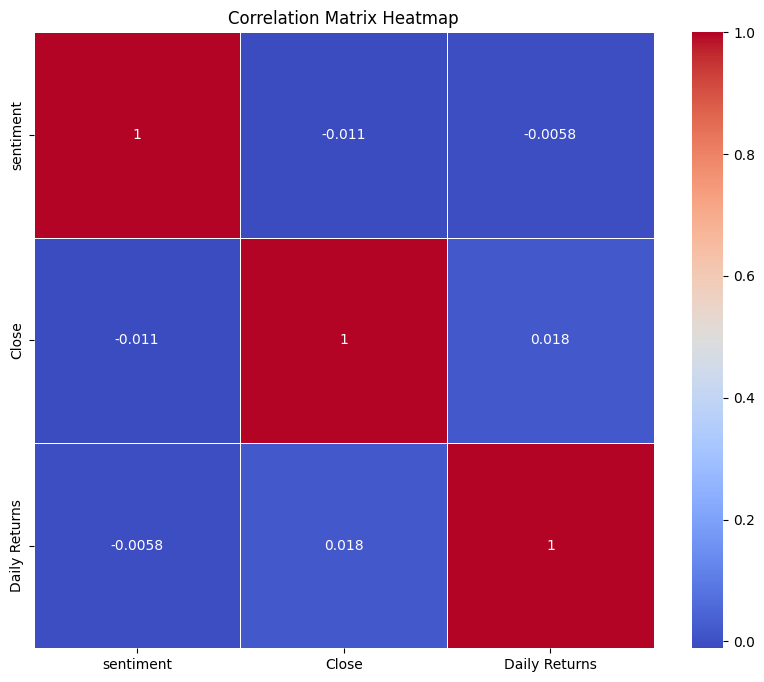

In [33]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()